In [1]:
from huggingface_hub import notebook_login

notebook_login()

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [3]:
from datasets import load_dataset

cnn_news_summary_ds = load_dataset("kraina/airbnb",'all')

cnn_news_summary_ds

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


0000.parquet:   0%|          | 0.00/4.70M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/51707 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['_id', 'city', 'realSum', 'room_type', 'room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat', 'day_type'],
        num_rows: 51707
    })
})

In [4]:
import pandas as pd

df = pd.DataFrame(cnn_news_summary_ds['train'])
df.head()

,_id,city,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,day_type
0,0,Amsterdam,194.033698,Private room,False,True,2.0,False,1,0,...,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekdays
1,1,Amsterdam,344.245776,Private room,False,True,4.0,False,0,0,...,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,weekdays
2,2,Amsterdam,264.101422,Private room,False,True,2.0,False,0,1,...,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,weekdays
3,3,Amsterdam,433.529398,Private room,False,True,4.0,False,0,1,...,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,weekdays
4,4,Amsterdam,485.552926,Private room,False,True,2.0,True,0,0,...,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,weekdays


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   _id                         51707 non-null  object 
 1   city                        51707 non-null  object 
 2   realSum                     51707 non-null  float64
 3   room_type                   51707 non-null  object 
 4   room_shared                 51707 non-null  bool   
 5   room_private                51707 non-null  bool   
 6   person_capacity             51707 non-null  float64
 7   host_is_superhost           51707 non-null  bool   
 8   multi                       51707 non-null  int64  
 9   biz                         51707 non-null  int64  
 10  cleanliness_rating          51707 non-null  float64
 11  guest_satisfaction_overall  51707 non-null  float64
 12  bedrooms                    51707 non-null  int64  
 13  dist                        517

In [6]:
df.describe()


,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [7]:
df.isnull().sum()


,0
_id,0
city,0
realSum,0
room_type,0
room_shared,0
room_private,0
person_capacity,0
host_is_superhost,0
multi,0
biz,0


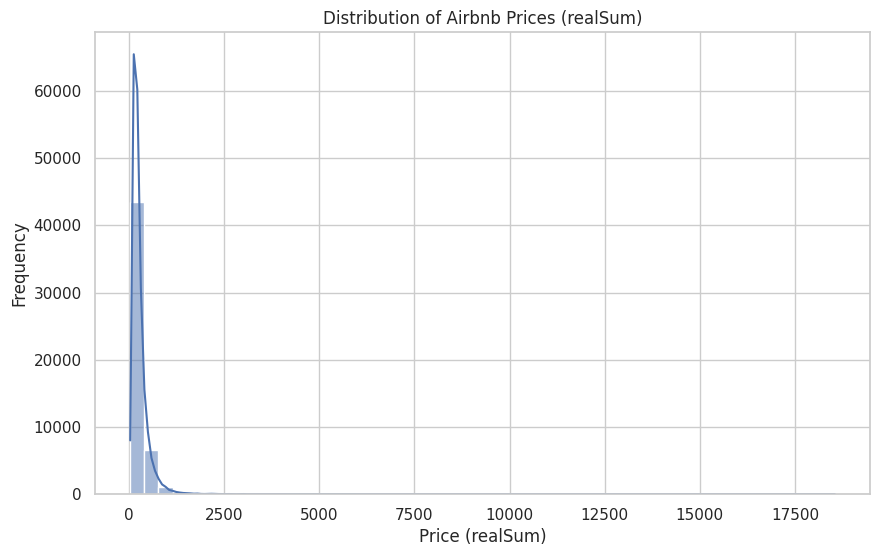

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['realSum'], bins=50, kde=True)
plt.title('Distribution of Airbnb Prices (realSum)')
plt.xlabel('Price (realSum)')
plt.ylabel('Frequency')
plt.show()


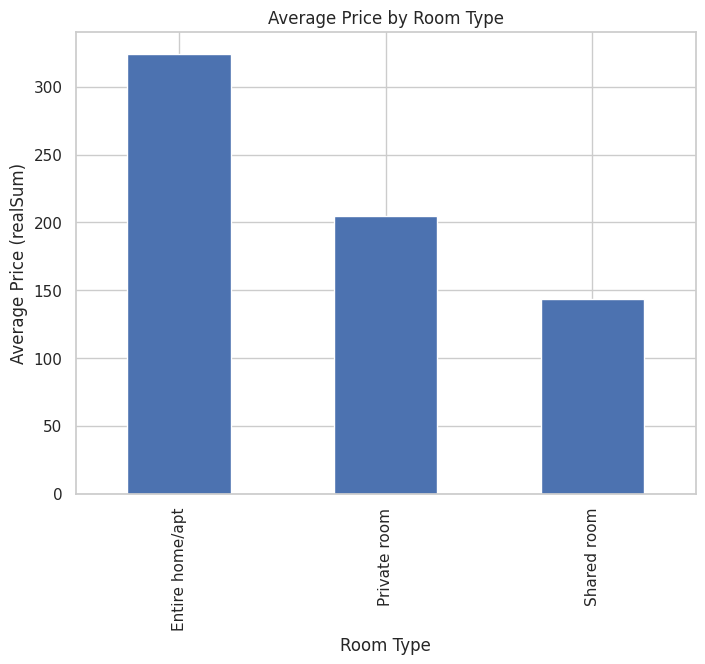

In [11]:
plt.figure(figsize=(8, 6))
avg_price_by_room_type = df.groupby('room_type')['realSum'].mean().sort_values(ascending=False)
avg_price_by_room_type.plot(kind='bar')
plt.title('Average Price by Room Type')
plt.ylabel('Average Price (realSum)')
plt.xlabel('Room Type')
plt.show()


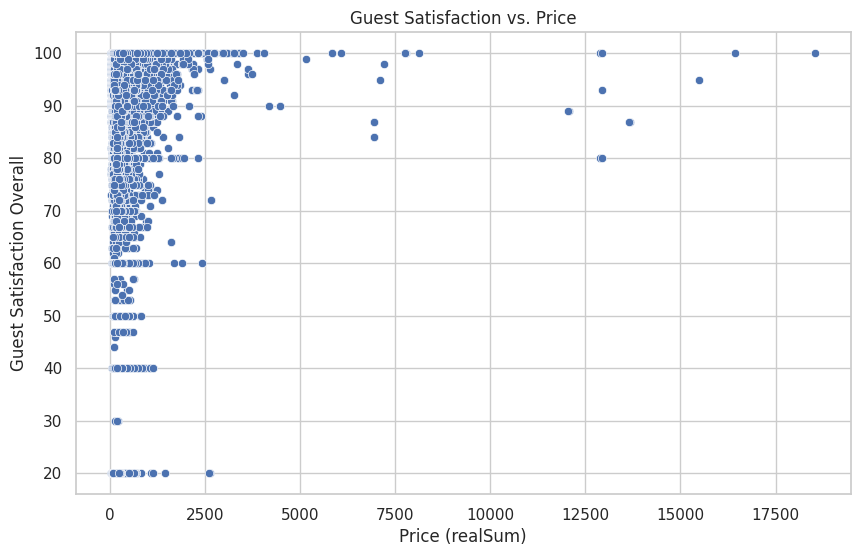

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='realSum', y='guest_satisfaction_overall', data=df)
plt.title('Guest Satisfaction vs. Price')
plt.xlabel('Price (realSum)')
plt.ylabel('Guest Satisfaction Overall')
plt.show()


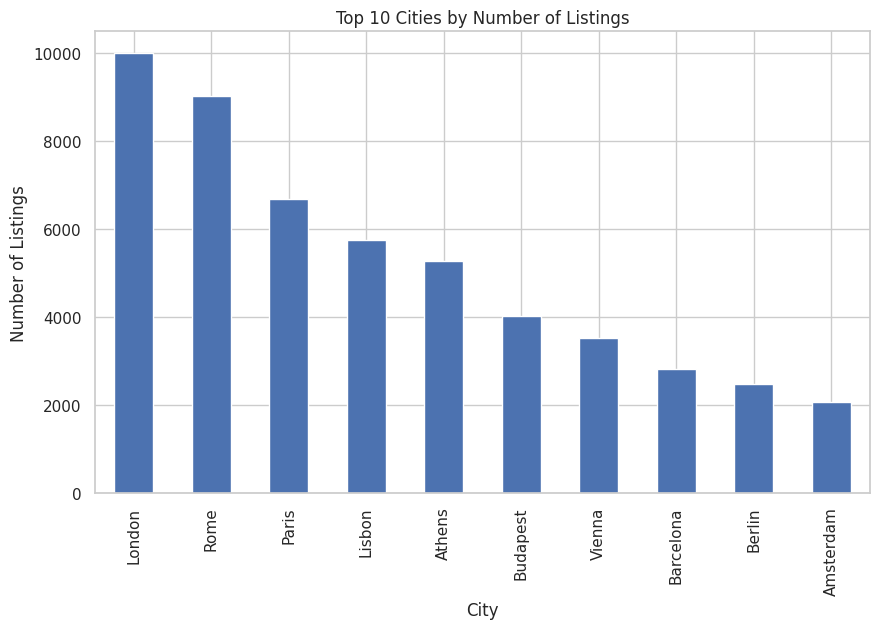

In [13]:
plt.figure(figsize=(10, 6))
df['city'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Cities by Number of Listings')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.show()
